# Retail Sales Forecasting (Linear Regression) 

- You are given monthly sales data of a retail store along with product category and discount percentage. 
The goal is to predict future sales revenue using Linear Regression.

In [27]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

## step 1 
- load data

In [13]:
data = pd.read_csv(r"C:\Users\sudhin\Downloads\retail_sales.csv")

## This data says about 
- month (1–24, simulating 2 years of data)
- product category (Electronics, Clothing, Groceries, Furniture) 
- discount (0–50%) 
- sales amount (simulated sales revenue with seasonal + discount effect 

## Part A: Exploratory Data Analysis (EDA) 

- display the first 5 rows of the dataset. 

In [14]:
data.head()

,month,product_category,discount,sales_amount
0,7,Groceries,40,3646.694737
1,20,Clothing,11,3105.122313
2,15,Electronics,25,20746.530584
3,11,Furniture,45,15380.077765
4,8,Furniture,33,12621.822690


## Data cleaning process
- check for null values
- Then check duplicates

In [15]:
data.isna().sum()

month               0
product_category    0
discount            0
sales_amount        0
dtype: int64

- There is no have any null or missing values


In [16]:
data.duplicated().sum()

np.int64(0)

- There is no have duplicated entry


## Visualization

<Axes: xlabel='month', ylabel='sales_amount'>

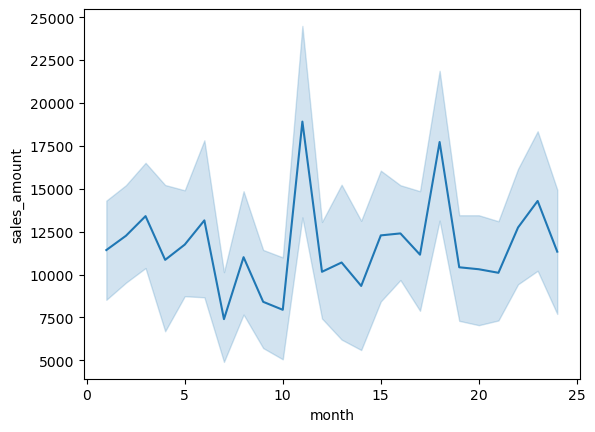

In [31]:
# Monthly sales trend (line chart).

sns.lineplot(data ,x = "month" ,y = "sales_amount")

array([ 7, 20, 15, 11,  8, 21, 19, 23, 24,  4,  3, 22,  2, 12,  6,  1, 17,
       10, 16,  5,  9, 18, 14, 13])

In [28]:
data

,month,product_category,discount,sales_amount
0,7,Groceries,40,3646.694737
1,20,Clothing,11,3105.122313
2,15,Electronics,25,20746.530584
3,11,Furniture,45,15380.077765
4,8,Furniture,33,12621.822690
...,...,...,...,...
495,13,Clothing,22,4849.168321
496,4,Electronics,11,21902.901618
497,16,Clothing,19,4914.551849
498,24,Electronics,4,22219.573047


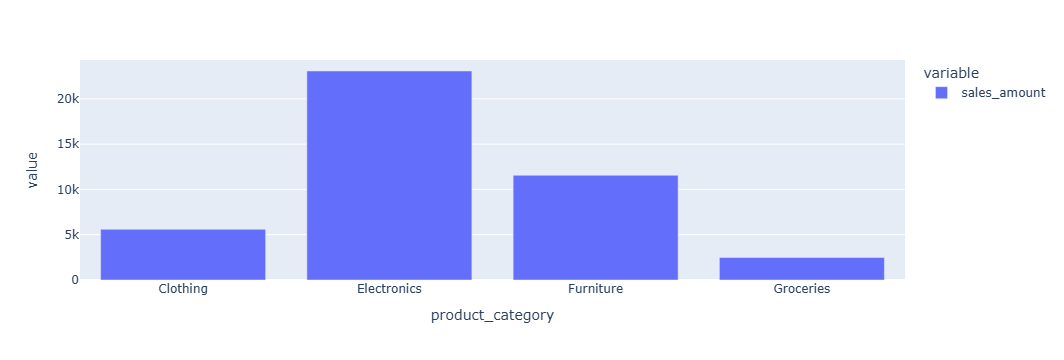

In [35]:
# Average sales by product category (bar chart). 
x = data.groupby('product_category')['sales_amount'].mean()
px.bar(x)

In [83]:
data_copy = pd.read_csv(r"C:\Users\sudhin\Downloads\retail_sales.csv")

In [85]:
data_copy.corr(numeric_only=True)

,month,discount,sales_amount
month,1.000000,-0.085626,0.029547
discount,-0.085626,1.000000,0.100636
sales_amount,0.029547,0.100636,1.000000


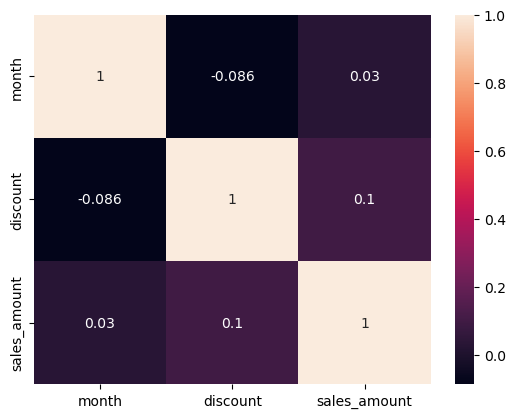

In [38]:
# Correlation heatmap of numerical features. 
corr = data.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()

# Part B: Feature Engineering & Preprocessing 
1. Encode categorical feature product category. 
2. Handle missing values in the discount column. 
3. Create a new feature: net sales = sales amount - (sales amount * discount/100). 
4. Define target variable = net sales.

In [41]:
# Encode categorical feature product category.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [42]:

data['product_category_le'] = le.fit_transform(data['product_category'])

In [81]:
data.head()


,month,product_category,discount,sales_amount,product_category_le,net sales,net_sales
0,7,Groceries,40,3646.694737,3,2188.016842,2188.016842
1,20,Clothing,11,3105.122313,0,2763.558859,2763.558859
2,15,Electronics,25,20746.530584,1,15559.897938,15559.897938
3,11,Furniture,45,15380.077765,2,8459.042771,8459.042771
4,8,Furniture,33,12621.822690,2,8456.621202,8456.621202


In [44]:
le.classes_ 

array(['Clothing', 'Electronics', 'Furniture', 'Groceries'], dtype=object)

- Clothing = 0
- Electronics = 1
- Furniture = 2
- Groceries = 3

In [53]:
# Create a new feature: net sales = sales amount - (sales amount * discount/100). 
data['net_sales'] = data['sales_amount'] - (data['sales_amount'] * data['discount'] / 100)

In [54]:
data

,month,product_category,discount,sales_amount,product_category_le,net sales,net_sales
0,7,Groceries,40,3646.694737,3,2188.016842,2188.016842
1,20,Clothing,11,3105.122313,0,2763.558859,2763.558859
2,15,Electronics,25,20746.530584,1,15559.897938,15559.897938
3,11,Furniture,45,15380.077765,2,8459.042771,8459.042771
4,8,Furniture,33,12621.822690,2,8456.621202,8456.621202
...,...,...,...,...,...,...,...
495,13,Clothing,22,4849.168321,0,3782.351290,3782.351290
496,4,Electronics,11,21902.901618,1,19493.582440,19493.582440
497,16,Clothing,19,4914.551849,0,3980.786997,3980.786997
498,24,Electronics,4,22219.573047,1,21330.790125,21330.790125


# Model building

In [55]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

In [56]:
data.columns

Index(['month', 'product_category', 'discount', 'sales_amount',
       'product_category_le', 'net sales', 'net_sales'],
      dtype='object')

In [61]:
x = data[['month','discount', 'sales_amount',
       'product_category_le']]
y = data['net_sales']

# Part C: Predictive Modelling (Linear Regression) 
1. Split the dataset into training (80%) and testing (20%). 
2. Train a Linear Regression model to predict net sales. 
3. Evaluate the model using:
   - RMSE (Root Mean Squared Error)
   - MAE (Mean Absolute Error)
4. Interpret coefficients: Which factors (month, category, discount) most affect sales?

In [62]:
x_train ,x_test ,y_train ,y_test = train_test_split(x,y ,test_size = 0.2 ,random_state =42)

In [60]:
y_train

249     1444.744764
433     1625.682253
19      8832.703059
322    13119.044398
332     2166.859315
           ...     
106    18940.821985
270     8868.060893
348     3523.111230
435     3038.214320
102    21789.777532
Name: net_sales, Length: 400, dtype: float64

In [63]:
model = LinearRegression()
model

LinearRegression()

In [64]:
model.fit(x_train,y_train)

LinearRegression()

In [65]:
model.intercept_

np.float64(3014.540581546693)

In [66]:
model.coef_

array([   3.99328236, -115.05337422,    0.72556324,  -24.75003966])

In [71]:
y_pred = model.predict(x_test)
predicted = pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
predicted

,Actual,Predicted
361,3347.393040,4024.765231
73,6610.731350,6562.985982
374,3976.901880,3644.091638
155,19787.437779,20465.298945
104,7290.498350,7256.461778
...,...,...
347,2015.378674,2503.018359
86,14936.942558,15853.648741
75,13356.277733,15659.278997
438,2581.538595,2906.326156


In [77]:
# Evaluate the model using
from sklearn.metrics import mean_squared_error , mean_absolute_error ,mean_absolute_percentage_error


In [78]:
mean_squared_error(y_test , y_pred)

1146352.0118240605

In [79]:
mean_absolute_error(y_test , y_pred)

821.1262151117718

In [80]:
mean_absolute_percentage_error(y_test , y_pred)*100

31.412620414609517